<a href="https://colab.research.google.com/github/Poojashrees3/Statistics-and-machine-learning/blob/main/Exercise_3_stats_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding**

**1.T-Test**

**2.Z-Test**

**3.Anova**

 **4.Correlation/Regression**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
species_counts = iris['species'].value_counts()
print(species_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**1. T-Test**

In [4]:
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']

print("Setosa petal length:", setosa_petal_length[:5])
print("Versicolor petal length:", versicolor_petal_length[:5])


Setosa petal length: 0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64
Versicolor petal length: 50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64


**Independent T-test**

Setosa petal length: 0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64
Versicolor petal length: 50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64

T-statistic (Setosa petal length vs Versicolor petal length): -39.492719391538095
P-value: 5.404910513441677e-62
Reject the null hypothesis: There is a significant difference in average petal length  between Setosa and Versicolor.


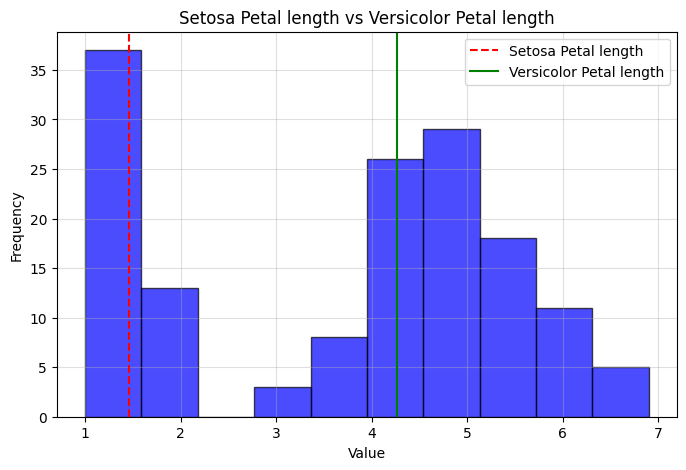

In [24]:
from scipy.stats import ttest_ind

# Independent two-sample t-test
t_statistic_sv, p_value_sv = ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"\nT-statistic (Setosa petal length vs Versicolor petal length): {t_statistic_sv}")
print(f"P-value: {p_value_sv}")

alpha = 0.05

if p_value_sv == alpha: #if value is equal to 0.05 it is null hypothesis(H0), else it is alternative hypothesis(H1)
    print("Fail to reject the null hypothesis: No significant difference in average petal length  between Setosa and Versicolor.")
else:
    print("Reject the null hypothesis: There is a significant difference in average petal length  between Setosa and Versicolor.")

plt.figure(figsize=(8, 5))
plt.hist(iris['petal_length'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(setosa_petal_length), color='red', linestyle='--', label='Setosa Petal length')
plt.axvline(np.mean(versicolor_petal_length), color='green', linestyle='-', label='Versicolor Petal length')
plt.title('Setosa Petal length vs Versicolor Petal length')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

**2. Z-Test**

In [23]:
from scipy import stats
setosa_data = iris[iris['species'] == 'setosa']

# Sample mean and standard deviation
sample_mean = setosa_data['sepal_length'].mean()
sample_std = setosa_data['sepal_length'].std()
sample_size = len(setosa_data)

print("Sample Mean: ",sample_mean)
print("Sample Standard Deviation: ",sample_std)
print("Sample Size: ",sample_size)

# Hypothesized population mean
specific_value = 5.0

# Performing the Z-test
z_statistic, p_value = stats.ttest_1samp(setosa_data['sepal_length'], specific_value)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value == alpha: #if value is equal to 0.05 it is null hypothesis(H0), else it is alternative hypothesis(H1)
    print("Fail to reject the null hypothesis: No significant difference in average sepal length between Setosa and the population mean.")
else:
    print("Reject the null hypothesis: There is a significant difference in average sepal length between Setosa and the population mean.")

Sample Mean:  5.006
Sample Standard Deviation:  0.3524896872134512
Sample Size:  50
Z-statistic: 0.12036212238318053
P-value: 0.9046884777690936
Reject the null hypothesis: There is a significant difference in average sepal length between Setosa and the population mean.


**3. ANOVA**


In [6]:
setosa_petal_width = iris[iris['species'] == 'setosa']['petal_width']
versicolor_petal_width = iris[iris['species'] == 'versicolor']['petal_width']
virginica_petal_width = iris[iris['species'] == 'virginica']['petal_width']

print("Setosa petal width:", setosa_petal_width[:5])
print("Versicolor petal width:", versicolor_petal_width[:5])
print("Virginica petal width:", virginica_petal_width[:5])

Setosa petal width: 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64
Versicolor petal width: 50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
Name: petal_width, dtype: float64
Virginica petal width: 100    2.5
101    1.9
102    2.1
103    1.8
104    2.2
Name: petal_width, dtype: float64


In [17]:
from scipy.stats import f_oneway

# Performing One-way ANOVA

f_statistic_abc, p_value_abc = f_oneway(setosa_petal_width,versicolor_petal_width,virginica_petal_width)

print("\nF-statistic (ANOVA across Setosa petal width, Versicolor petal width, and Virginica petal width):", f_statistic_abc)
print("P-value:" ,p_value_abc)

alpha=0.05

if p_value_abc == alpha: #if value is equal to 0.05 it is null hypothesis(H0), else it is alternative hypothesis(H1)
    print("Fail to reject the null hypothesis: No significant difference in average petal width among the species.")
else:
    print("Reject the null hypothesis: There is a significant difference in average petal width among the species.")



F-statistic (ANOVA across Setosa petal width, Versicolor petal width, and Virginica petal width): 960.007146801809
P-value: 4.169445839443116e-85
Reject the null hypothesis: There is a significant difference in average petal width among the species.


**4.** **Correlation**/**Regression**

Correlation between sepal length and petal length: 0.8717537758865831
Linear Regression Equation: petal_length = 1.86 * sepal_length + -7.10


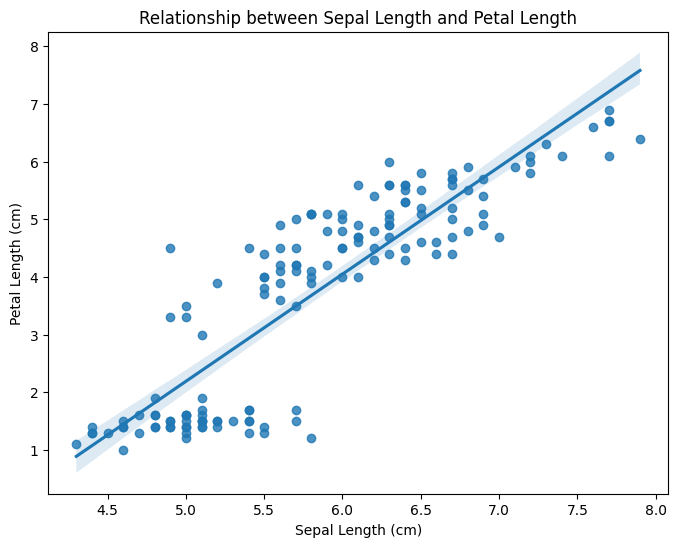

In [8]:
from sklearn.linear_model import LinearRegression

# Calculate the correlation between sepal length and petal length
correlation = iris['sepal_length'].corr(iris['petal_length'])
print(f"Correlation between sepal length and petal length: {correlation}")

# Prepare the data
X = iris[['sepal_length']]  # Features (sepal length)
y = iris['petal_length']    # Target variable (petal length)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

#To Get the coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Regression Equation: petal_length = {slope:.2f} * sepal_length + {intercept:.2f}")

#To Make predictions
y_pred = model.predict(X)

# plotting
plt.figure(figsize=(8, 6))
sns.regplot(x='sepal_length', y='petal_length', data=iris)
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()